# Curs 5. Tipuri de date. Calitatea si preprocesarea datelor. Statistici descriptive

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(f'NumPy version: {np.__version__}')
print(f'pandas version: {pd.__version__}')

NumPy version: 1.19.2
pandas version: 1.2.3


## Tipuri de date

* Un set de date este o colectie de obiecte-data (eng: data objects) si de atribute.
* Sinonime pentru obiecte-data: înregistrare, punct, vector, pattern (termen ce poate induce confuzie), eveniment, caz, esantion (termen ce poate induce confuzie), observatie, entitate.
* Obiectele sunt descrise prin atribute
* Sinonime pentru atribut: **variabila**, **caracteristica**, **trasatura (feature)**, **dimensiune** (a nu se confunda cu omonimul din algebra).

<img src="./images/date.png" alt="drawing" width="400px"/>

**Definitie**: Atribut: proprietate sau caracteristica a unui obiect ce poate sa varieze fie de la un obiect la altul, fie de la un moment de timp la altul.
* Exemple: culoarea ochilor, temperatura.
* Trebuie facuta diferenta între proprietatile atributelor si proprietatile valorilor atributelor:
    * acelasi atribut poate avea valori diferite: înaltimea poate fi masurata în metri sau picioare 
    * diferite atribute pot fi masurate cu acelasi tip de date, dar proprietatile atributelor pot fi diferite: pentru niste persoane, atributele “inaltime” si “id” sunt reprezentate prin numere întregi; în timp ce are sens sa faci media înaltimilor, nu are nicio noima media id-urilor; operatiile ce se pot face pentru înaltime (medie, max etc.) nu se aplica si pentru id-uri; id-urile nu au un maxim, în timp ce înaltimea - da.

### Tipuri de atribute
Exista diferite tipuri de atribute:
* Categoriale (calitative)
    * **nominale**: valori diferite care permit recunoasterea diferentelor; exemple: cod postal, id-uri, culoarea ochilor, genul; operatii permisibile: =, $\ne$;
    * **ordinale**: valorile permit ordonarea obiectelor; exemple: scara duritatii mineralelor, grade (militare etc.), gradul de satisfactie pentru un anumit produs; operatii permise: =, $\ne$, <, >; functii aplicabile: mediana, percentile etc.
* Numerice (cantitative)
    * **interval**: se poate face diferenta între valori (i.e. exista unitati de masura asociate); exemple: date calendaristice, temperaturi in grade Celsius sau Fahrenheit; pe lânga operatiile de mai sus admit si adunare, scadere; functii aplicabile: media, deviatia standard, corelatia
    * **multiplicabile**: permit împartiri si înmultiri; exemple: temperatura în Kelvin, cantitati monetare, numar de elemente, vârsta, greutate; operatii: cele de mai sus si inmultirea, impartirea; functii aplicabile: media geometrica, variatie procentuala.

### Transformari la nivel de atribute
Exista niste transformari care se pot efectua sau nu asupra unor atribute:
* pentru atribute nominale: orice asociere unu-la-unu (bijectie), de exemplu permutari; daca toti angajatii au un id, reasignarea lor nu ar modifica esenta datelor;
* pentru atribute ordinale: orice modificare de valori care respecta ordinea datelor (transformare monotona): val_noua = f (val_veche), unde f (·) functie monoton crescatoare; {bun, mai bun, cel mai bun} poate fi reprezentat prin {1, 2, 3} sau la fel de bine prin {0.3, 12, 14};
* pentru atribute interval: transformari de forma a * val_veche + b unde a si b sunt constante; ex: transformarea din Celsius în Fahrenheit;
* pentru atribute multiplicabile: $val\_veche / val\_noua = r$; ex: raportul greutatii lui x si y este 2.

### Descrierea atributelor prin numarul de valori
* Atribute discrete:
    * o multime cel mult numarabila de valori;
    * exemple: coduri postale, cuvinte într-un document
    * se reprezinta cel mai frecvent ca numere naturale
    * caz special — atribute binare: {prezent, absent}
* Atribute continue:
    * valorile sunt exprimate prin numere reale
    * exemple: temperatura, masa
    * dpdv practic reprezentarea se face cu o precizie finita
    * reprezentare actuala: valori în virgula mobila
    
* Valori asimetrice:
    * doar prezenta unei trasaturi (i.e. valoare non–zero) este importanta
    * exemple: vectorul care reprezinta daca niste cuvinte sunt prezente (eventual: de cate ori) într-un document
    * daca se iau in considerare doi astfel de vectori, conteaza mai mult cuvintele pe care le au în comun decât cuvintele care lipsesc din ambele documente, simultan

### Tipuri de seturi de date

* Seturi de date de tip: înregistrare, de tip graf si de tip secventa
* Caracteteristici generale:
    * **dimensionalitatea** = numarul de atribute pe care obiectele-data le au. Un numar de dimensiuni prea mare duce la “blestemul dimensionalitatii”; pentru multe dimensiuni se pot aplica tehnici de reducere a numarului de dimensiuni;
    * **caracterul rarefiat al datelor** = procentul de date utile; de exemplu, pentru date asimetrice este numarul de valori nenule. Specularea acestui caracter poate reduce drastic necesarul de memorie sau timpul de calcul;
    * **rezolutia** = scara la care se face raportarea valorilor; e posibil ca scari diferite sa releve (sau sa ascunda) pattern-uri; ex: masuratori meteo raportate pe zile pot arata iminenta unei furtuni, dar la scala de saptamâni asa ceva nu mai e vizibil

#### Seturi de date de tip înregistrare

* cel mai des furnizate si frecvent utilizate in aplicatii: multime de obiecte cu un set predefinit de atribute
* nu exista legatura intre inregistrari distincte
* stocare: fisiere text (e.g. CSV), Excel, baze de date relationale – views

Cazuri remarcabile de seturi de date inregistrare:
* Tranzactii, date specifice cosurilor de cumparaturi:
    * exemplu: intr-un magazin, setul de produse cumparate de un client in timpul unei sesiuni de cumparaturi = continutul cosului de cumparaturi
    * se analizeaza asocierea intre produsele individuale din tranzactii
    * posibilitate de reprezentare: indicator boolean care arata daca un produs anume face sau nu parte dintr-un cos de cumparaturi
    * variatie: cate exemplare din produs au fost achizitionate (0, 1, . . . )
 <img src="./images/MBA.png" alt="drawing" width="400px"/>
* Matrice de date:
    * pentru cazul in care datele au acelasi set fix de atribute *numerice*
    * fiecare data in parte poate fi considerata un punct in spatiu multidimensional
    * fiecare atribut considerat este o dimensiune
    * este tipul de date standard pentru analiza statistica
    * nota: intre conceptul de dimensiune asa cum e definit in matematica si cel de dimensiune—atribut pot exista diferente
 <img src="./images/matrix.png" alt="drawing" width="600px"/>
 * Matrice de date rarefiate:
     * caz special al datelor matrice
     * date asimetrice: in putine cazuri anumite trasaturi sunt prezente, predominanta este lipsa trasaturilor
     * exemplu: tranzactii din cosuri de cumparaturi in care modelarea se face: obiectul (nu) a fost cumparat
     * exemplu: documente cu continut dintr-un anumit lexic; pentru un document se creeaza un vector numeric, care la fiecare cuvant are precizat daca apare (eventual: de cate ori apare) sau nu = matricea document–termen
     * in practica, tipuri de date specializate pentru date rare sunt benefice; [Sparse matrices](https://docs.scipy.org/doc/scipy/reference/sparse.html)
      <img src="./images/document-term-matrix.png" alt="drawing" width="600px"/>

#### Seturi de date de tip graf

* reprezentare convenabila pentru cazurile:
    * graful reprezinta relatii între obiecte
    * obiectele însele sunt reprezentate ca graf
##### Caz 1: datele reprezinta relatii între obiecte
* obiectele sunt reprezentate ca noduri în graf
* relatiile dintre obiecte sunt reprezentate sub forma de arce sau muchii
* exemplu: pagini web care contin legaturi catre alte pagini
* exemplu de algoritm ce foloseste structura de graf: [algoritmul PageRank](http://en.wikipedia.org/wiki/Pagerank)
<img src="./images/graf1.png" alt="drawing" width="400px"/>
<img src="./images/html.png" alt="drawing" width="400px"/>

##### Caz 2: obiectele-data sunt grafuri
* obiectele pot contine subobiecte care sunt legate între ele
* uneori nu doar legaturile sunt importante, ci si forma lor: unghiul dintre muchii poate avea aceeasi relevanta ca si legaturile însele;
* exemplu: formulele chimice - benzen = $C_6H_6$
* utilitate: se poate detecta care substructura apare mai des; sau daca prezenta sau absenta unor astfel de substructuri este legata de prezenta/absenta anumitor proprietati chimice.
* domeniu aparte: “mineritul” substructurilor
<img src="./images/benzen.png" alt="drawing" width="400px"/>

#### Seturi de tip secventa
* atributele au relatii care implica ordonare în timp sau spatiu
* subtipuri: date secventiale, secventa, serii de timp si date spatiale

##### Caz: date secventiale
* numite si date temporale
* fiecare înregistrare are un atribut suplimentar de timp asociat
<img src="./images/secvtran.png" alt="drawing" width="400px"/>

##### Caz: date secventa
* setul de date entitati individuale, precum secvente de cuvinte sau de litere;
* similare cu cele secventiale, dar fara timp inclus
* pozitia din secventa este importanta
* exemplu: informatia genetica este o secventa de nucleotide (gene)
* aplicatie: predictia similaritatilor în structura si functia genelor pe baza similaritatii dintre secvente
<img src="./images/genom.png" alt="drawing" width="400px"/>

##### Caz: serii de timp
* fiecare înregistrare e o serie de timp = o serie de masuratori efectuate la anumite momente de timp
* exemplu: seturi de date de tip financiar, reprezentând valorile unor stocuri
* exemplu: date meteo masurate lunar
<img src="./images/meteo1.png" alt="drawing" width="400px"/>
<img src="./images/meteo2.png" alt="drawing" width="400px"/>

##### Caz: Date spatiale
* cazul datelor care au atribute spatiale sau areale
* exemplu: date climatice raportate pe regiuni
* exemplu: date adunate pentru scurgerea unui fluid — pozitia diferitelor puncte este inregistrata
<img src="./images/spatial.png" alt="drawing" width="400px"/>

## Calitatea datelor

### Probleme legate de masurarea si colectarea datelor

* Presupunerea ca datele pe baza carora se face DS sunt de calitate perfecta este naiva
* Prevenirea problemelor care duc la scaderea calitatii datelor nu este o optiune pentru un data scientist
* Abordari:
    *  detectarea si corectarea erorilor = curatarea datelor
    *  construirea de algoritmi care sa tolereze o calitate slaba a datelor
* surse de probleme în calitatea datelor:
    * procesele de masurare
    * aplicatiile folosite
    
* Zgomotul
    * componenta aleatoare care se adauga unui proces de masurare
    * Exemplu: distorsiunea vocii unei persoane pe o linie telefonica slaba
    * Daca eroarea apare mereu în acelasi loc: artefact

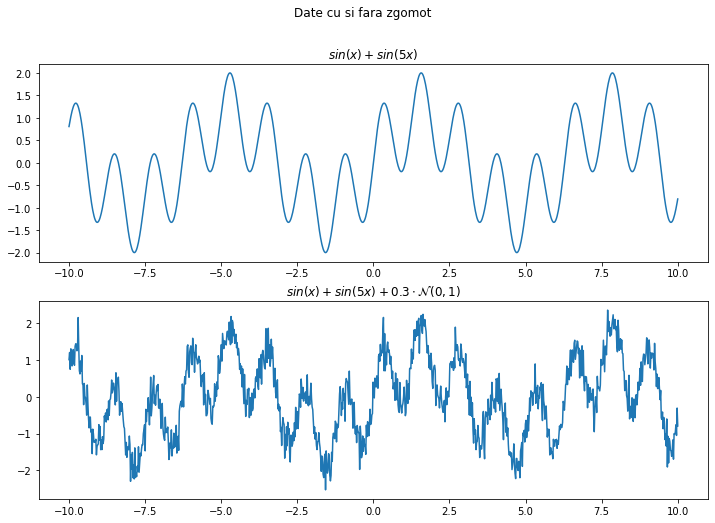

In [16]:
x = np.linspace(-10, 10, 1000)
y = np.sin(x) + np.sin(5*x)

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 8))
fig.suptitle('Date cu si fara zgomot')
ax1.set_title(r'$sin(x) + sin(5x)$')
ax1.plot(x, y)
ax2.set_title(r'$sin(x) + sin(5x) + 0.3 \cdot \mathcal{N}(0, 1)$')
ax2.plot(x, y + 0.3 * np.random.randn(len(x)));

### Calitatea datelor: precizie, abatere, acuratete
* **Precizie**: apropierea valorilor rezultate prin masuratori repetate ale aceleiasi cantitati.
* **Abatere (eng: bias)**: o variatie sistematica a masuratorilor fata de cantitatea reala.

* Exemplu: se masoara o cantitate de 1 gram. Valorile obtinute sunt: {1.015, 0,990, 1.013, 1,001, 0.986}. Media este 1.001, deci abaterea este |1.001 − 1| = 0.001.
* Precizia este considerata abaterea standard:
    * $\sigma = \sqrt{E[(X - E(X))^2]}$
deci pentru datele de mai sus precizia este 0.013.
* **Acuratetea**: apropierea masuratorilor fata de valoarea adevarata ce se vrea a fi masurata.

### Calitatea datelor: anomalii
* Anomaliile sunt obiecte cu caracteristici considerabil diferite fata de majoritatea obiectelor din setul de date
* Anomaliile (outliers) nu sunt zgomote, ci obiecte legitime
* Utilitate: detectarea de nise pe piata, detectarea fraudelor

<img src="./images/outliers.png" alt="drawing" width="400px"/>

### Calitatea datelor: valori lipsa
* Cazuri: una sau mai multe valori de atribute lipsesc
* Motive pentru lipsa valorilor:
    * informatia nu este colectata — oamenii nu vor sa spuna vârsta sau greutatea
    * atributele nu se pot aplica tot timpul tuturor obiectelor: copiii nu au venituri
* Operarea în aceste situatii:
    * eliminarea obiectelor-data sau a atributelor cu valori lipsa
    * estimarea valorilor lipsa
    * ignorarea valorilor lipsa în timpul analizei

### Calitatea datelor: valori inconsistente; duplicare
* Valori inconsistente:
    * Exemplu: oras si cod postal precizate, dar codul postal corespunde altui oras
    * Exemplu: typos, marimi cu valori improprii (greutate negativa)
    * Operare: detectarea valorilor gresite si corectarea folosind interventie umana
    * E necesara utilizarea surselor de date redundante sau a cunostintelor specifice domeniului
* Date duplicate:
    * Duplicarea poate sa fie exacta sau aproape exacta
    * Exemplu: aceeasi persoana cu adrese de email diferite
    * Procesul de curatare = deduplicare

### Calitatea datelor din perspectiva aplicatiilor
* Din perspectiva aplicatiilor, “datele au calitate buna daca sunt potrivite pentru utilizarea intentionata”
* Caracterul oportun al datelor — daca datele sunt perimate, atunci modele si pattern–urile obtinute sunt depasite
* Relevanta — in cazul in care se vrea crearea de modele pentru accidente rutiere, omiterea genului si vârstei coducatorilor duce modele cu acuratete mica; alta situatie este data de esantionarea neadecvata
* Cunostintele apriori despre date — de exemplu, faptul ca anumite atribute sunt puternic corelate sau construite unele pe baza altora poate fi utilizata pentru reducerea redundantei si a dimensionalitatii; cunoasterea preciziei datelor, a caracterului lor oportun sau a scalei de masura e de cele mai mult ori esentiala.

## Preprocesarea datelor
* Strategii si tehnici complexe, ce pot cere pâna la 60% din timpul total al procesului de extragere de cunostinte
* Doua variante:
    1. selectara obiectelor-data si a atributelor
    1. crearea/schimbarea de atribute
* Variante de preprocesare:
    * agregare
    * esantionare
    * reducerea dimensionalitatii
    * selectarea unui subset de atribute
    * crearea de atribute
    * discretizare si binarizare
    * transformarea variabilelor

### Agregare

* Scop: combinarea a doua sau mai multe atribute (sau obiecte) într–un singur atribut (sau obiect)
* Utilitate:
    * reducerea cantitatii de date
    * schimbarea scalei: orasele sunt agregate în regiuni, state, continente
    * date mai stabile: datele agregate au tendinta de a avea variabilitate mai mica
    
 <img src="./images/agregare1.png" alt="drawing" width="400px"/>
 <img src="./images/agregare2.png" alt="drawing" width="400px"/>

### Esantionare
* principala tehnica folosita pentru selectarea datelor
* în statistica, a fost folosita atât pentru investigatii preliminare cât si pentru analiza finala a datelor
* este folosita pentru ca obtinerea întregului set de date este imposibila sau costisitoare
* în DM esantionarea este folosita pentru ca procesarea întregului set de date este consumatoare de timp
* un esantion este reprezentativ daca are aproximativ aceleasi proprietati de interes ca si setul originar
* utilizarea unui esantion reprezentativ e aproape la fel de exacta ca folosirea întregului set de date
* tipuri de esantionare:
    * esantionare aleatoare uniforma: avem o probabilitate egala de alegere a unui obiect anume
    * esantionare fara înlocuire: daca un obiect este selectat, atunci el este scos din populatie
    * esantionare cu înlocuire: obiectele nu sunt scoase din populatie atunci când sunt selectate; un acelasi obiect poate fi selectat de mai mult de o data
    * esantionarea stratificata: se divid datele în partitii (ex: femei/barbati); din fiecare partitie se extrage apoi esantion, a.i. proportia din straturi sa fie aceeasi cu proportia din multimea initiala.
    
<table>
  <tr>
      <td> <img src="./images/sampling1.png" alt="drawing" width="400px"/> Esantion de 8000 de puncte</td>
      <td> <img src="./images/sampling2.png" alt="drawing" width="400px"/>  Esantion de 2000 de puncte</td>
      <td> <img src="./images/sampling3.png" alt="drawing" width="400px"/>  Esantion de 500 de puncte</td>
  </tr>
</table>  

* Determinarea marimii esantionului
    * problema: avem un set de date care consta dintr-un numar mic de     grupuri, în fiecare grup e aproximativ acelasi numar de obiecte
    * trebuie extras un esantion astfel încât din fiecare grup sa fie cel putin     un element selectat
    * “garantarea” se exprima probabilist: care e numarul de date din esantion astfel încât probabilitatea ca sa fie adevarata proprietatea de la punctul anterior sa depaseasca un anumit prag?
<table>
  <tr>
      <td> <img src="./images/samplingsize1.png" alt="drawing" width="400px"/> 10 grupuri de puncte</td>
      <td> <img src="./images/samplingsize2.png" alt="drawing" width="400px"/>  Probabilitatea de regasire a macar unui punct
din fiecare grup, în functie de marimea esantionului</td>
  </tr>
</table>  

### Reducerea dimensionalitatii
* seturile de date pot avea un numar mare de atribute
apare fenomenul de “blestem al dimensionalitatii”: datele sunt rare în spatiu multidimenional
* valorile pentru densitate de probabilitate si distante dintre puncte – critice pentru clustering si detectarea de anomalii — devin nerelevante
* solutie: reducerea dimensionalitatii fara a pierde prea mult din informatie
* beneficii: algoritmii de DM lucreaza mai eficient pe dimensiuni mai putine; modelele rezultate sunt mai simple, inteligibile
* Scop:
    * evitarea blestemului dimensionalitatii
    * reducerea timpului de rulare necesar algoritmilor de DM
    * datele devin mai usor de vizualizat
    * poate ajuta la eliminarea trasaturilor irelevante sau reducerea zgomotului
* Tehnici folosite:
    * analiza componentelor principale (Principal Component Analysis)
    * descompunerea valorilor principale (Singular Value Decomposition)
    * alte metode: supervizate si transformari neliniare

### Selectarea subsetului de atribute
* motivatie: de multe ori, în seturile de date pot exista atribute redundante (e.g. pret si pret cu taxe incluse) sau irelevante (e.g. id-uri)
* unele din aceste atribute pot fi eliminate prin “bun simt” sau prin cunoastere apriori a (datelor) problemei
* varianta ideala de lucru: se încearca toate combinatiile de trasaturi; numarul de încercari ar fi deci: $C_n^1 + C_n^2 + \dots + C_n^n=2^n-1$ deci prohibitiv prin brute force
* variante:
    1. metode încorporate — algoritmul de DM însusi decide ce atribute sa se foloseasca: e.g. arborii de decizie
    1. metode de filtrare — atributele sunt selectate înainte de a se aplica algoritmul: e.g. selectarea atributelor pentru care corelatia este minima sau PCA
    1. metode bazate pe încercare — se foloseste un algoritm oarecare de DM si se încearca diferite subseturi de trasaturi – dar nu brute force;
    
* Pentru selectarea subsetului de trasaturi e nevoie de:
    * o masura pentru evaluarea unui subset de atribute
    * o metoda de cautare pentru generarea unui nou subset de atribute
    * un criteriu de oprire
    * o procedura de validare
* Alternativa pentru selectarea de atribute: ponderarea atributelor
    * atribute importante -> ponderi mari; atribute nerelevante -> ponderi     mici
    * ponderile se pot asocia pe baza cunostintelor asupra domeniului sau     prin metode automate

### Crearea de trasaturi
* Scop: crearea de noi atribute pe baza celor existente (e.g. raportul dintre venituri si cheltuieli, dintre masa corporala si înaltime)
* Noile atribute pot releva mai eficient informatia ascunsa în date
* Numarul atributelor noi obtinute poate fi mai mic decât la plecare
* Metode:
    * Extragere de trasaturi
    * Transformarea datelor, utilizarea unui alt spatiu
    * Construirea de trasaturi
    
* Exemplu: extragerea de trasaturi 
    * crearea unui nou set de atribute pe baza celor existente
    * exemplu: fotografie -> detectarea muchiilor
    * metodele sunt strâns legate de domeniu — algoritmi de procesare     grafica, utilizarea unor variabile economice derivate etc.
<table>
  <tr>
      <td> <img src="./images/lena_1.jpg" alt="drawing" width="400px"/> Imagine initiala</td>
      <td> <img src="./images/lena_2.png" alt="drawing" width="400px"/> Imagine dupa "edge detection"</td>
  </tr>
</table> 

* Exemplu: transformarea datelor
    * trecerea de la coordonatele carteziene la cele polare
<img src="./images/polar1.png" alt="drawing" width="600px"/>
    * transformata Fourier
 <table>
  <tr>
      <td> <img src="./images/fourier1.png" alt="drawing" width="400px"/> Doua functii sinusoidale de frecvente diferite</td>
      <td> <img src="./images/fourier2.png" alt="drawing" width="400px"/> Doua functii sinusoidale plus zgomot</td>
      <td> <img src="./images/fourier3.png" alt="drawing" width="400px"/> Spectrul de putere, obtinut dupa aplicarea transformatei Fourier"</td>
  </tr>
</table> 
    * construirea de noi atribute
        * uneori, atributele originare pot sa aiba informatia necesara dar formatul acestor date este neadecvat pentru algoritmul de DS
        * exemplu: pentru retele neurale intrarea este numerica, dar datele curente au si valori nominale
        * exemplu de trasatura derivata: densitatea = masa / volumul 
        * crearea de noi trasaturi necesita cunoasterea domeniului problemei

### Discretizare si binarizare
* unii algoritmi cer ca datele sa fie în forma de atribute categoriale
* algoritmii de determinare a asocierilor cer date binare
* apare nevoia de a transforma atribute continue în atribute discrete (discretizare) sau chiar binare (binarizare)
* Discutie pentru binarizare:
    * $m$ valori -> fiecare valoare initiala se transforma într–un numar întreg din intervalul $[0,m − 1]$ si apoi se foloseste transcrierea în baza 2
    * daca atributele sunt ordinale, atunci trebuie pastrata ordinea prin transformare
    * exemplu: {slab, mediu, bun} -> $\{(x_1 = 0, x_2 = 0), (x_1 = 0, x_2 = 1), (x_1 = 1, x_2 = 0)\}$
    * $\lceil \log_2 m \rceil$ biti folositi
    * one hot encoding: pentru m clase se folosesc m biti; fiecare bit     arata prezenta sau absenta unei trasaturi
    exemplu: {slab, mediu, bun} -> $(x_1 = 0, x_2 = 0, x_3 = 1), (x_1 = 0, x_2 = 1, x_3 = 0), (x_1 = 1, x_2 = 0, x_3 = 0)$
* Discretizare a atributelor continue
    * procesul de discretizare este dependent de date si de tipul problemei
    * pasi:
        * se decide numarul de categorii ce se produc;
        * se decide modul de asociere între valorile continue si cele discrete
        * exemplu: se sorteaza datele, se efectueaza n − 1 taieturi în interval si pentru fiecare subinterval se asigneaza o eticheta
* Discretizare nesupervizata
    * intervalele pot fi de latime egala sau considerate astfel încât sa
    * prezinte frecvente egale
    * metode de clustering, e.g. K-means
    * inspectare vizuala a datelor
 <table>
  <tr>
      <td> <img src="./images/discretizare1.png" alt="drawing" width="400px"/> Datele originare</td>
      <td> <img src="./images/discretizare2.png" alt="drawing" width="400px"/> Discretizare cu latime egala</td>
  </tr>
  <tr>
      <td> <img src="./images/discretizare3.png" alt="drawing" width="400px"/> Discretizare cu frecventa egala</td>
      <td> <img src="./images/discretizare4.png" alt="drawing" width="400px"/> Discretizare cu K–means</td>
  </tr>
</table> 
* Discretizare supervizata
    * utilizarea de informatie suplimentara – etichetele de clasa – poate duce la o discretizare mai buna
    * conceptual: discretizarea sa se faca astfel încât sa se maximizeze “puritatea” intervalelor
    * metode statistice: intervale mai mici se unesc astfel încât sa nu se depaseasca un prag de puritate
* Atribute categoriale cu prea multe atribute
    * exemplu: o multitudine de departamente
    * se pot unifica pe domenii: inginerie, stiinte sociale, biologie
    * altfel: gruparea poate fi facuta în conjunctie cu un algoritm de ML în care se urmareste îmbunatatirea rezultatului de clasificare

### Transformarea de variabile
* transformare care se aplica la toate valorile unei variabile
* exemplu: daca doar amplitudinea unei valori este importanta, atunci se poate considera valoarea absoluta a variabilei
* functii folosite: $\exp(x)$, $\log(x)$, $\sqrt{x}$, $1/x$, functia putere
* functii complexe: normalizare
* pentru datele care prezinta domeniu mare de valori: scara logaritmica $x \to \frac{1}{x}$ poate fi mai adecvata
    * exemplu: transferuri de date de 109, 108, 1000, 10 octeti; prin transformare magnitudinea nu mai e importanta, se ajunge la valori pe scala mai ingusta: 9, 8, 3, 1.
* aplicarea trebuie facuta în cunostinta de cauza: transformarea $x \to \frac{1}{x}$ e o functie de monotonie descrescatoare;

### Exemplu de transformare: standardizarea
* în statistica: daca $\overline{x}$ este media unui atribut si $s_x$ e abaterea standard a valorilor atributului:
$$
s_x = \sqrt{E[(x - \overline{x})]^2}
$$
atunci transformarea $x \to \frac{x-\overline{x}}{s_x}$ creeaza o noua variabila cu media zero si abaterea 1; operatia se numeste standardizare.
* exemplu: persoane cu variabilele: venitul anual si înaltimea; diferentele între înaltimi sunt mici comparativ cu diferentele între venituri; diferentele între venituri ar domina distanta între doi oameni, daca s–ar calcula direct pe baza valorilor; standardizarea reduce asemenea diferente de magnitudine
* problema: abaterea patratica medie e influentata prea usor de date extreme, outliers; uneori se considera abaterea absoluta medie $$\sum\limits_{i=1}^m \frac{|x_i - \mu|}{m}$$ unde $\mu$ e media sau mediana

## Explorarea datelor: Statistici de sumarizare

### Explorarea datelor

* Explorarea datelor reprezintă investigarea preliminară a datelor, cu scopul de a obţine o înţelegere a caracteristicilor lor
* Pasul de explorare poate fi de folos în alegerea paşilor de preprocesare sau analiză
* Se poate folosi abilitatea naturală a oamenilor de a recunoaşte pattern-uri
* Domeniul a fost introdus de către statisticianul John Tukey: Exploratory Data Analysis, Addison-Wesley
* AED este domeniu opus lui “Confirmatory Data Analysis”, care are ca scop testarea ipotezelor statistice, calculul intervalelor de încredere etc.
* Curs de AED: [aici](https://www.coursera.org/learn/data-analysis-with-python?specialization=ibm-data-science&utm_source=gg&utm_medium=sem&campaignid=2087860785&utm_campaign=10-IBM-Data-Science-ROW&utm_content=10-IBM-Data-Science-ROW&adgroupid=116274867101&device=c&keyword=&matchtype=b&network=g&devicemodel=&adpostion=&creativeid=506892807488&hide_mobile_promo&gclid=Cj0KCQjw3duCBhCAARIsAJeFyPXK3OK8IjOz8JJKRl_TJckzX-yWJrboZGvrVzGL9QL0-8PazMsYrrQaAnG4EALw_wcB)

* În AED, aşa cum este definit de Tukey:
    * Focus-ul este pe vizualizare
    * Gruparea (clustering) şi detectarea de anomalii sunt văzute ca tehnici exploratorii
    * Acestea două sunt subdomenii aparte ale DM, dincolo de analiză exploratorie

### Setul de date Iris

* Constă în date măsurate pentru 150 de flori de iris, din 3 specii (Iris Setosa, Iris Versicolour, Iris Virginica, câte 50 de exemplare pe specie)
* Măsurătorile sunt pentru lungimea/lăţimea petalelor/sepalelor în centimetri (4 coloane)
* A cincea coloană este specia florii – atribut nominal
* Datele se pot descărca [de aici](http://archive.ics.uci.edu/ml/datasets/Iris)

In [35]:
iris_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv(iris_url, header = None)
data.columns = iris_columns
data.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


![Iris](https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png)
Sursa: morioh.com

### Statistici de sumarizare

* Statisticile de sumarizare sunt numere care schiţează caracteristicile unui set de valori
* Reprezintă manifestarea cea mai vizibilă a statisticii
* Exemple: frecvenţa, media, dispersia

#### Frecvenţa şi valoarea modală

Pentru un set de m date categoriale cu valorile $\{v_1, . . . , v_i , . . . , v_k\}$ frecvenţa relativa a unei valori $v_i$ este:
$$
frecventa(v_i) = \frac
{\text{numarul de obiecte cu valoarea } v_i}
{m}
$$
iar frecventa absoluta este numaratorul fractiei de mai sus.

In [30]:
from collections import Counter
freq_iris = Counter(data['class'])
rel_freq_iris = {iris_type:freq / len(data) for iris_type, freq in freq_iris.items()}

In [31]:
print(f'Frequency: {freq_iris}')
print(f'Relative Frequency: {rel_freq_iris}')

Frequency: Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})
Relative Frequency: {'Iris-setosa': 0.3333333333333333, 'Iris-versicolor': 0.3333333333333333, 'Iris-virginica': 0.3333333333333333}


* Valoarea modală (sau moda) este valoarea cu cea mai mare frecvenţă:
$$
moda = \arg\max\limits_{v_i} frecventa(v_i)
$$
* Atenţie la situaţia când o anume valoare este folosită pentru a semnifica lipsa datelor: null-ul poate apărea ca modă
* Pot exista seturi de date pentru care frecvenţa maximă să fie atinsă pentru mai multe valori = seturi multimodale
* Pentru valori continue, conceptele de modă/frecvenţă nu sunt utile, cu excepţia cazului când se aplică un pas de discretizare

#### Percentile

* Pentru cazul valorilor ordonate se pot considera percentilele 
* Pentru un atribut continuu sau ordinal $x$ şi un număr $p$ întreg între 0 şi 100, a $p$-a percentilă $x_p$ este o valoare din şirul de valori ale lui $x$ astfel încât $p%$ din aceste valori sunt mai mici decât $x_p$
* Nu există o definiţie standardizată pentru percentile, cea de mai sus este luată pentru fixare
* Pentru cazul în care se calculează percentile pentru set mare de date, diferenţele datorate diferitelor moduri de definire devin neesenţiale
* Tradiţional se consideră $x_{0\%} = \min(x)$ iar din definiţie se poate arăta că $x_{100\%} = \max(x)$
* Mod de calcul pentru determinarea celei de a $p$-a percentile: pentru un set de $m$ date se calculează valoarea întreagă $k$ cea mai apropiată de $\frac{m}{100} \cdot p + \frac{1}{2}$ si se ia valoarea corespunzătoare acestui rang $k$ în şirul $x$
sortat
* Functie utilizabila: [numpy.percentile](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) sau functia pandas [pandas.Dataframe.quantile](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html)

In [34]:
help(np.percentile)

Help on function percentile in module numpy:

percentile(a, q, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
    Compute the q-th percentile of the data along the specified axis.
    
    Returns the q-th percentile(s) of the array elements.
    
    Parameters
    ----------
    a : array_like
        Input array or object that can be converted to an array.
    q : array_like of float
        Percentile or sequence of percentiles to compute, which must be between
        0 and 100 inclusive.
    axis : {int, tuple of int, None}, optional
        Axis or axes along which the percentiles are computed. The
        default is to compute the percentile(s) along a flattened
        version of the array.
    
        .. versionchanged:: 1.9.0
            A tuple of axes is supported
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output,
     

In [53]:
_25th_percentile_sepal_length = np.percentile(data.sepal_length, 25)

print(f'Cate valori sunt strict mai mici decat a 25-a percentila: {np.sum(data.sepal_length < _25th_percentile_sepal_length)}')
print(f'Cate valori sunt strict mai mici sau egale decat a 25-a percentila: {np.sum(data.sepal_length <= _25th_percentile_sepal_length)}')
print(f'lista valorilor sortate: {list(data.sepal_length.sort_values())}')

# se poate intelege pentru aceste date de ce definitia exacta a percentilelor nu este indeplinita: sunt multe valori = 5.1 

Cate valori sunt strict mai mici decat a 25-a percentila: 32
Cate valori sunt strict mai mici sau egale decat a 25-a percentila: 41
lista valorilor sortate: [4.3, 4.4, 4.4, 4.4, 4.5, 4.6, 4.6, 4.6, 4.6, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2, 5.2, 5.2, 5.3, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.9, 5.9, 5.9, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.2, 6.2, 6.2, 6.2, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.5, 6.5, 6.5, 6.5, 6.5, 6.6, 6.6, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.8, 6.8, 6.8, 6.9, 6.9, 6.9, 6.9, 7.0, 7.1, 7.2, 7.2, 7.2, 7.3, 7.4, 7.6, 7.7, 7.7, 7.7, 7.7, 7.9]


In [54]:
data['sepal_length'].quantile(q=0.25)

5.1

#### Media si mediana

* Pentru un set de valori ${x_1, x_2, . . . , x_m}$ valoarea medie este:
$$
\overline{x} = E(x) = mean(x) = \frac{1}{m} \sum\limits_{i=1}^m x_i
$$
* Mediana este a 50-a percentila. O varianta bruta este sortarea valorilor in ordine crescatoare, obtinandu-se permutarea (reordonarea) $\{x_{(1)}, x_{(2)}, \dots, x_{(m)}\}$; mediana este:
$$
mediana(x) = \begin{cases}
x_{r+1} & \text{daca }m=2r+1
\\
\frac{x_{(r)} + x_{(r+1)}}{2} & \text{daca }m=2r
\end{cases}
$$
O varianta mai rafinata (si care se poate aplica si la calculul de percentile) este utilizarea de statistici de ordine (complexitate liniara in loc de $O(n\log n)$).

Obtinere: [numpy.median](https://numpy.org/doc/stable/reference/generated/numpy.median.html) sau [pandas.DataFrame.median](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html).

In [57]:
np.median(data.sepal_length.values)

5.8

Diferente intre medie si mediana:
* Media este valoare "de mijloc" doar dacă distribuţia datelor este simetrică: arata la fel in stanga si in dreapta unei valori - care e chiar "mijlocul"
* Dacă distribuţia este asimetrică, atunci mediana este un indicator mai bun pentru valoare de mijloc
* Media este influenţată de outliers, în timp ce mediana – nu
* Medie retezată (eng: trimmed mean) se utilizează pentru a exlude anomaliile: se fixează un procent p între 0 şi 100; se elimină primele şi ultimele $(p/2)\%$ din date; se calculează media pentru ceea ce rămâne
* media standard se obţine din media retezată cu $p = 0$

Exemple:
* Considerăm valorile {1, 2, 3, 4, 5, 90}. Media este 17.5, mediana este 3.5. Valoarea de trimmed mean pentru p = 40% este 3.5, considerabil diferită faţă de media setului întreg de date
* Media, medianele şi valoarea de trimmed mean pentru iris sunt:
<img src="./images/stats_iris.png" alt="drawing" width="600px"/>
* Exerciţiu: dacă valoarea medianei este mai mică decât media, ce puteţi spune despre date?

#### Măsurari ale împrăştierii datelor

* Sunt măsuri care cuantifică concentrarea datelor
* Diametrul domeniului de valori (eng: range) al unui set de date $\{x_1, x_2, . . . , x_m\}$ corespunzător atributului x este
$$
range(x) = \max(x) - \min(x) = x_{(m)} - x_{(1)}
$$
* Range-ul este nerelevant, deoarece putem avea că majoritatea datelor sunt concentrate într–o zonă îngustă, dar câteva valori outlier măresc artificial diametrul setului
* Varianţa (dispersia; eng: variance) unui set de date de $m$ valori este:
$$
varianta(x) = s_x^2 = \frac{1}{m-1} \sum\limits_{i=1}^{m} (x_i - \overline{x})^2
$$
* Utilizarea numitorului $m − 1$ în loc de $m$ este numită [corecţia Bessel](http://en.wikipedia.org/wiki/Bessel%27s_correction) şi are ca scop corectarea abaterii din estimarea varianţei de populaţie
* Abaterea standard este $s_x = \sqrt{s_x^2}$ şi are aceeaşi unitate de măsură ca şi atributul x
* Python: [numpy.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html)

In [59]:
np.std(data.petal_length), np.std(data.sepal_length)

(1.7585291834055201, 0.8253012917851409)

* Deoarece media poate să fie distorsionată de outliers, rezultă că dispersia poate fi şi ea influenţată
* Se preferă considerarea altor trei măsuri:
    * absolute average deviation, AAD:
    $$
    AAD(x) = \frac{1}{m} \sum\limits_{i=1}^m |x_i - \overline{x}|
    $$
    * median absolute deviation, MAD:
    $$
    MAD(x) = median(\{|x_1-\overline{x}|, \dots, |x_m-\overline{x}|\})
    $$
    * interquartile range:
    $$
    IQR(x) = x_{75\%} - x_{25\%}
    $$

Verificam ca prin standardizare de date, media devine 0 si valoarea 1:

In [69]:
med_petal_length = np.mean(data.petal_length)
# centram datele: media lor devine 0
centered_petal_length = data.petal_length - med_petal_length
# assert 0 == np.mean(centered_petal_length) # fails, FP zmall values ~ 0
assert np.allclose(0, np.mean(centered_petal_length))
std_petal_length = np.std(data.petal_length)
std_centered_petal_length = np.std(centered_petal_length)
assert np.allclose(std_petal_length, std_centered_petal_length)
standardized_petal_length = centered_petal_length/std_centered_petal_length
# verificare: media 0...
assert np.allclose(0, np.mean(standardized_petal_length))
# si standard deviation ~ 1
assert np.allclose(1, np.std(standardized_petal_length))

### Statistici de sumarizare a datelor multivariate

* Date multivariate: date cu mai multe atribute
* Pentru atributul $x_i$ calculăm media $\overline{x}_i$
* Media setului de obiecte este $\mathbf{x} = (\overline{x}_1, . . . , \overline{x}_n)$
* Analog se poate calcula dispersia, mediana etc. pe fiecare dimensiune
* Matricea de covarianţă: elementul $s_{ij}$ este covarianta de atributelor $x_i$ si $x_j$:
$$
s_{ij} = covarianta(x_i, x_j) = \frac{1}{m-1}\sum\limits_{k=1}^m (x_{ki} - \overline{x}_i)(x_{kj} - \overline{x}_j)
$$
unde $x_{pq}$ este a $p$-a valoare a atributului $x_q$
* $s_{ij}$ este măsură a gradului în care două atribute variază împreună (mai precis: care este gradul lor de dependenţă liniară) şi depinde de magnitudinea valorilor atributelor
* $s_{ij}=0$ arata ca atributele $s_i$ si $s_j$ nu sunt liniar dependente
* pentru a elimina dependenta de magnitudinea datelor, definim matricea de corelatie:
$$
r_{ij} = corelatia(x_i, x_j) = \frac{covarianta(x_i, x_j)}{s_i s_j} \in [-1, 1]
$$
* $r_{ij}$ se mai numeste corelatia Pearson a atributelor $x_i$ si $x_j$
* $r_{ij} = \pm 1$ indica faptul ca $x_i$ e in relatie liniara cu $x_j$:
$$
x_{ki} = a \cdot x_{kj} + b
$$
cu $sgn(a)=sgn(r_{ij})$

<img src="./images/800px-Correlation_examples.png" alt="drawing" width="600px"/>
Seturi de date (x, y) împreună cu coeficientul de corelaţie. Coeficientul de corelaţie surprinde gradul în care un nor de puncte poate fi aproximat printr-o dreaptă (sus) precum şi modul în care ele sunt legate liniar (creştere simultană sau
evoluţii în sensuri diferite), dar nu şi panta acestei legături (figurile din mijloc) sau relaţii mai complexe între date (rândul de jos). Sursa: Wikipedia.

Legat de coeficientul de corelaţie, câteva observaţii:
* “Corelaţia nu înseamnă cauzalitate” – nu se poate folosi o valoare absolută apropiată de 1 ca argument că între două atribute există o relaţie de cauzalitate. Corelaţie mare poate fi o condiţie necesară pentru legătură de cauzalitate, dar nu asigură şi suficienţa. Cu toate acestea, corelaţia mare poate fi folosită ca punct de pornire în cercetarea unei legături între diferite fenomene.
* Corelaţia şi liniaritatea – coeficientul Pearson reprezintă puterea unei relaţii liniare între două seturi de valori, dar nu caracterizează complet relaţia dintre date.
* Exemplu: 4 seturi de date cu două atribute; în toate situaţiile media şi dispersia lui y este aceeaşi, de asemenea avem acelaşi coeficient de corelaţie în fiecare caz (0.816); cu toate acestea, legătura dintre x şi y e extrem de diferită de la un caz la altul:
<img src="./images/800px-Anscombe's_quartet_3.svg.png" alt="drawing" width="800px"/>
Date cu caracteristici numerice identice (medie, dispersie, corelaţie), dar esenţial diferite ca natură: cvartetul lui Anscombe. Sursa: Wikipedia